In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Pegando o arquivo
from google.colab import files
uploaded = files.upload()

Saving teste.csv to teste.csv
Saving treino.csv to treino.csv


In [ ]:
#Importando os dados de treino e teste
df_treino = pd.read_csv('treino.csv')
df_teste = pd.read_csv('teste.csv')

In [ ]:
df_treino.head()

,id,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5,obito
0,2708,13.0,solteira,de4a6,36.0,vaginal,2440.0,nao,f,9.0,10.0,0
1,14097,25.0,casada,7mais,39.0,cesareo,2850.0,nao,f,9.0,10.0,0
2,5360,27.0,solteira,7mais,38.0,cesareo,3350.0,nao,f,9.0,10.0,0
3,15902,28.0,solteira,7mais,41.0,vaginal,3065.0,nao,m,8.0,9.0,0
4,8985,21.0,solteira,de4a6,39.0,cesareo,3085.0,nao,f,8.0,9.0,0


In [ ]:
df_teste.head()

,id,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5
0,5493,24.0,casada,7mais,40.0,cesareo,3120.0,nao,f,9.0,10.0
1,12311,25.0,uniao,7mais,38.0,cesareo,2805.0,nao,f,9.0,10.0
2,15520,16.0,solteira,de4a6,39.0,cesareo,3600.0,nao,f,9.0,10.0
3,15095,22.0,uniao,de1a3,26.0,vaginal,635.0,nao,f,7.0,8.0
4,2275,29.0,casada,de1a3,26.0,cesareo,442.0,nao,m,3.0,8.0


In [ ]:
df_treino.isnull().sum()

id                  0
idademae            0
estadocivilmae     96
catprenatal        40
qtdsemanas        226
tipoparto           5
peso                2
malformacao       304
sexo               39
apgar1            100
apgar5             95
obito               0
dtype: int64

In [ ]:
df_teste.isnull().sum()

id                  0
idademae            1
estadocivilmae     38
catprenatal        13
qtdsemanas         96
tipoparto           0
peso                0
malformacao       143
sexo               12
apgar1             48
apgar5             49
dtype: int64

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11389 non-null  int64  
 1   idademae        11389 non-null  float64
 2   estadocivilmae  11293 non-null  object 
 3   catprenatal     11349 non-null  object 
 4   qtdsemanas      11163 non-null  float64
 5   tipoparto       11384 non-null  object 
 6   peso            11387 non-null  float64
 7   malformacao     11085 non-null  object 
 8   sexo            11350 non-null  object 
 9   apgar1          11289 non-null  float64
 10  apgar5          11294 non-null  float64
 11  obito           11389 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 1.0+ MB


# Analisando a correlação entre os dados

In [ ]:
df_treino.corr()

,id,idademae,qtdsemanas,peso,apgar1,apgar5,obito
id,1.000000,-0.001040,0.000790,-0.003471,0.008595,0.014887,-0.001090
idademae,-0.001040,1.000000,0.029301,0.054437,0.045466,0.040019,-0.027939
qtdsemanas,0.000790,0.029301,1.000000,0.819643,0.591498,0.585729,-0.626797
peso,-0.003471,0.054437,0.819643,1.000000,0.593660,0.573869,-0.663052
apgar1,0.008595,0.045466,0.591498,0.593660,1.000000,0.881047,-0.687433
apgar5,0.014887,0.040019,0.585729,0.573869,0.881047,1.000000,-0.655362
obito,-0.001090,-0.027939,-0.626797,-0.663052,-0.687433,-0.655362,1.000000


# ID

In [ ]:
df_treino['id'].isnull().sum()

0

# idade mãe

In [ ]:
df_treino['idademae'].value_counts()

23.0    623
24.0    622
25.0    622
20.0    620
22.0    596
26.0    596
21.0    593
19.0    586
27.0    569
28.0    530
29.0    529
30.0    507
18.0    487
31.0    477
17.0    449
33.0    396
32.0    392
34.0    329
16.0    326
35.0    307
36.0    235
37.0    199
15.0    185
38.0    153
14.0     98
39.0     93
40.0     82
41.0     52
42.0     48
13.0     31
43.0     24
44.0     15
45.0      7
46.0      4
48.0      3
12.0      2
11.0      1
52.0      1
Name: idademae, dtype: int64

In [ ]:
df_treino['idademae'].isnull().sum()

0

In [ ]:
df_teste['idademae'].isnull().sum()

1

### Vamos substituir pela idade mediana

In [ ]:
df_teste['idademae'].fillna(df_teste['idademae'].median(),inplace=True)

# Estado civil

In [ ]:
df_treino['estadocivilmae'].value_counts()

solteira    4214
casada      4163
uniao       2784
separada     111
viuva         21
Name: estadocivilmae, dtype: int64

In [ ]:
df_teste['estadocivilmae'].value_counts()

casada      1791
solteira    1790
uniao       1183
separada      68
viuva         12
Name: estadocivilmae, dtype: int64

In [ ]:
df_treino['estadocivilmae'].isnull().sum()

96

In [ ]:
df_teste['estadocivilmae'].isnull().sum()

38

In [ ]:
df_treino['estadocivilmae'].fillna('sem nada',inplace=True)
df_teste['estadocivilmae'].fillna('sem nada',inplace=True)

In [ ]:
df_treino['estadocivilmae'].isnull().sum()

0

In [ ]:
'''
df_treino = pd.get_dummies(df_treino,columns=['estadocivilmae'])
df_teste = pd.get_dummies(df_teste,columns=['estadocivilmae'])
'''

"\ndf_treino = pd.get_dummies(df_treino,columns=['estadocivilmae'])\ndf_teste = pd.get_dummies(df_teste,columns=['estadocivilmae'])\n"

In [ ]:
for i in df_treino.index:
  xx = df_treino.iloc[i,2]
  if xx == 'solteira':
    df_treino['estadocivilmae'][i] = 0
  elif xx == 'uniao':
    df_treino['estadocivilmae'][i] = 1
  elif xx == 'casada':
    df_treino['estadocivilmae'][i] = 2
  elif xx == 'separada':
    df_treino['estadocivilmae'][i] = 3
  elif xx == 'viuva':
    df_treino['estadocivilmae'][i] = 4
  else:
    df_treino['estadocivilmae'][i] = -999


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
for i in df_teste.index:
  xx = df_teste.iloc[i,2]
  if xx == 'solteira':
    df_teste['estadocivilmae'][i] = 0
  elif xx == 'uniao':
    df_teste['estadocivilmae'][i] = 1
  elif xx == 'casada':
    df_teste['estadocivilmae'][i] = 2
  elif xx == 'separada':
    df_teste['estadocivilmae'][i] = 3
  elif xx == 'viuva':
    df_teste['estadocivilmae'][i] = 4
  else:
    df_teste['estadocivilmae'][i] = -999


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11389 non-null  int64  
 1   idademae        11389 non-null  float64
 2   estadocivilmae  11389 non-null  object 
 3   catprenatal     11349 non-null  object 
 4   qtdsemanas      11163 non-null  float64
 5   tipoparto       11384 non-null  object 
 6   peso            11387 non-null  float64
 7   malformacao     11085 non-null  object 
 8   sexo            11350 non-null  object 
 9   apgar1          11289 non-null  float64
 10  apgar5          11294 non-null  float64
 11  obito           11389 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 1.0+ MB


# Vamos tratar com um get_dummy

# Quantidade de pré-natal

In [ ]:
df_treino['catprenatal'].value_counts()

7mais      6751
de4a6      3261
de1a3      1025
nenhuma     312
Name: catprenatal, dtype: int64

In [ ]:
df_teste['catprenatal'].value_counts()

7mais      2865
de4a6      1386
de1a3       471
nenhuma     147
Name: catprenatal, dtype: int64

In [ ]:
df_treino['catprenatal'].fillna('sem nada',inplace=True)
df_teste['catprenatal'].fillna('sem nada',inplace=True)

In [ ]:
df_treino['catprenatal'].value_counts()

7mais       6751
de4a6       3261
de1a3       1025
nenhuma      312
sem nada      40
Name: catprenatal, dtype: int64

In [ ]:
for i in df_treino.index:
  xx = df_treino.iloc[i,3]
  if xx == 'nenhuma':
    df_treino['catprenatal'][i] = 0
  elif xx == 'de1a3':
    df_treino['catprenatal'][i] = 1
  elif xx == 'de4a6':
    df_treino['catprenatal'][i] = 2
  elif xx == '7mais':
    df_treino['catprenatal'][i] = 3
  else:
    df_treino['catprenatal'][i] = -999


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
for i in df_teste.index:
  xx = df_teste.iloc[i,3]
  if xx == 'nenhuma':
    df_teste['catprenatal'][i] = 0
  elif xx == 'de1a3':
    df_teste['catprenatal'][i] = 1
  elif xx == 'de4a6':
    df_teste['catprenatal'][i] = 2
  elif xx == '7mais':
    df_teste['catprenatal'][i] = 3
  else:
    df_teste['catprenatal'][i] = -999


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
df_teste['catprenatal'].value_counts()

 3      2865
 2      1386
 1       471
 0       147
-999      13
Name: catprenatal, dtype: int64

# Semanas

In [ ]:
df_treino['qtdsemanas'].isnull().sum()

226

In [ ]:
df_teste['qtdsemanas'].isnull().sum()

96

In [ ]:
df_teste['qtdsemanas'].fillna(-999,inplace=True)
df_treino['qtdsemanas'].fillna(-999,inplace=True)

In [ ]:
df_treino['qtdsemanas']

0        36.0
1        39.0
2        38.0
3        41.0
4        39.0
         ... 
11384    41.0
11385    39.0
11386    40.0
11387    39.0
11388    39.0
Name: qtdsemanas, Length: 11389, dtype: float64

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4882 non-null   int64  
 1   idademae        4882 non-null   float64
 2   estadocivilmae  4882 non-null   object 
 3   catprenatal     4882 non-null   object 
 4   qtdsemanas      4882 non-null   float64
 5   tipoparto       4882 non-null   object 
 6   peso            4882 non-null   float64
 7   malformacao     4739 non-null   object 
 8   sexo            4870 non-null   object 
 9   apgar1          4834 non-null   float64
 10  apgar5          4833 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 419.7+ KB


# Tipo de parto	

In [ ]:
df_treino['tipoparto'].value_counts()

cesareo    7378
vaginal    4006
Name: tipoparto, dtype: int64

In [ ]:
df_teste['tipoparto'].value_counts()

cesareo    3161
vaginal    1721
Name: tipoparto, dtype: int64

In [ ]:
df_treino['tipoparto'].isnull().sum()

5

In [ ]:
df_teste['tipoparto'].isnull().sum()

0

In [ ]:
import statistics as sts

In [ ]:
moda_treino= sts.mode(df_treino['tipoparto'])

In [ ]:
df_treino['tipoparto'].fillna(moda_treino,inplace=True)

In [ ]:
df_treino["tipoparto_num"] =  df_treino['tipoparto'].map({'cesareo':1,'vaginal':0})
df_teste["tipoparto_num"] =  df_teste['tipoparto'].map({'cesareo':1,'vaginal':0})

# Peso

In [ ]:
df_treino['peso'].value_counts()

3000.0    174
3200.0    167
3100.0    164
3300.0    143
3400.0    127
         ... 
3548.0      1
3174.0      1
1680.0      1
3014.0      1
2614.0      1
Name: peso, Length: 1145, dtype: int64

In [ ]:
df_teste['peso'].value_counts()

3000.0    84
3200.0    80
3300.0    71
3400.0    68
3250.0    58
          ..
802.0      1
1080.0     1
1980.0     1
1550.0     1
3312.0     1
Name: peso, Length: 913, dtype: int64

In [ ]:
df_treino['peso'].isnull().sum()

2

In [ ]:
df_teste['peso'].isnull().sum()

0

In [ ]:
media_peso = round(df_treino['peso'].mean(),0)
print(media_peso)

2819.0


In [ ]:
df_treino['peso'].fillna(media_peso,inplace=True)

In [ ]:
df_treino

,id,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5,obito,tipoparto_num
0,2708,13.0,0,2,36.0,vaginal,2440.0,nao,f,9.0,10.0,0,0
1,14097,25.0,2,3,39.0,cesareo,2850.0,nao,f,9.0,10.0,0,1
2,5360,27.0,0,3,38.0,cesareo,3350.0,nao,f,9.0,10.0,0,1
3,15902,28.0,0,3,41.0,vaginal,3065.0,nao,m,8.0,9.0,0,0
4,8985,21.0,0,2,39.0,cesareo,3085.0,nao,f,8.0,9.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,16127,24.0,1,3,41.0,cesareo,2965.0,nao,f,9.0,10.0,0,1
11385,5192,23.0,2,3,39.0,cesareo,2850.0,sim,m,3.0,0.0,1,1
11386,12172,26.0,0,3,40.0,vaginal,3820.0,nao,m,9.0,10.0,0,0
11387,235,35.0,2,3,39.0,cesareo,2420.0,nao,f,7.0,9.0,0,1


In [ ]:
df_teste

,id,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5,tipoparto_num
0,5493,24.0,2,3,40.0,cesareo,3120.0,nao,f,9.0,10.0,1
1,12311,25.0,1,3,38.0,cesareo,2805.0,nao,f,9.0,10.0,1
2,15520,16.0,0,2,39.0,cesareo,3600.0,nao,f,9.0,10.0,1
3,15095,22.0,1,1,26.0,vaginal,635.0,nao,f,7.0,8.0,0
4,2275,29.0,2,1,26.0,cesareo,442.0,nao,m,3.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4877,7526,29.0,0,3,39.0,cesareo,4050.0,nao,f,10.0,10.0,1
4878,13366,20.0,0,2,39.0,cesareo,3300.0,nao,m,9.0,10.0,1
4879,530,25.0,0,3,38.0,cesareo,3380.0,nao,f,9.0,10.0,1
4880,7105,29.0,1,2,38.0,cesareo,3550.0,nao,f,9.0,10.0,1


# Má formação

In [ ]:
df_treino['malformacao'].value_counts()

nao    10652
sim      433
Name: malformacao, dtype: int64

In [ ]:
df_teste['malformacao'].value_counts()

nao    4571
sim     168
Name: malformacao, dtype: int64

In [ ]:
df_treino['malformacao'].isnull().sum()

304

In [ ]:
df_teste['malformacao'].isnull().sum()

143

In [ ]:
df_treino['malformacao'].fillna(-999,inplace=True)
df_teste['malformacao'].fillna(-999,inplace=True)

In [ ]:
df_treino["malformacao_num"] =  df_treino['malformacao'].map({'sim':1,'nao':0,-999:-999})
df_teste["malformacao_num"] =  df_teste['malformacao'].map({'sim':1,'nao':0,-999:-999})

# Sexo da criança

In [ ]:
df_treino['sexo'].value_counts()

m    5967
f    5383
Name: sexo, dtype: int64

In [ ]:
df_teste['sexo'].value_counts()

m    2513
f    2357
Name: sexo, dtype: int64

In [ ]:
df_treino['sexo'].isnull().sum()

39

In [ ]:
df_teste['sexo'].isnull().sum()

12

In [ ]:
df_treino['sexo'].fillna(-999,inplace=True)
df_teste['sexo'].fillna(-999,inplace=True)

In [ ]:
df_treino["sexo_num"] =  df_treino['sexo'].map({'m':1,'f':0,-999:-999})
df_teste["sexo_num"] =  df_teste['sexo'].map({'m':1,'f':0,-999:-999})

#Apgar 1 min

In [ ]:
df_treino['apgar1'].value_counts()

9.0     4865
8.0     2750
7.0      861
10.0     505
6.0      483
1.0      416
2.0      349
3.0      334
5.0      318
4.0      311
0.0       97
Name: apgar1, dtype: int64

In [ ]:
df_teste['apgar1'].value_counts()

9.0     2089
8.0     1146
7.0      363
10.0     215
6.0      211
2.0      174
1.0      173
5.0      153
3.0      149
4.0      114
0.0       47
Name: apgar1, dtype: int64

In [ ]:
df_treino['apgar1'].isnull().sum()

100

In [ ]:
df_teste['apgar1'].isnull().sum()

48

In [ ]:
df_treino['apgar1'].fillna(-999,inplace=True)
df_teste['apgar1'].fillna(-999,inplace=True)

# Apgar 5 min

In [ ]:
df_treino['apgar5'].value_counts()

10.0    5550
9.0     3100
8.0      918
7.0      480
6.0      296
5.0      208
1.0      190
4.0      174
3.0      134
0.0      125
2.0      119
Name: apgar5, dtype: int64

In [ ]:
df_teste['apgar5'].value_counts()

10.0    2360
9.0     1300
8.0      399
7.0      218
6.0      130
5.0      105
1.0       95
4.0       66
3.0       57
2.0       53
0.0       50
Name: apgar5, dtype: int64

In [ ]:
df_treino['apgar5'].isnull().sum()

95

In [ ]:
df_teste['apgar5'].isnull().sum()

49

In [ ]:
df_treino['apgar5'].fillna(-999,inplace=True)
df_teste['apgar5'].fillna(-999,inplace=True)

# Separando os dados

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11389 non-null  int64  
 1   idademae         11389 non-null  float64
 2   estadocivilmae   11389 non-null  object 
 3   catprenatal      11389 non-null  object 
 4   qtdsemanas       11389 non-null  float64
 5   tipoparto        11389 non-null  object 
 6   peso             11389 non-null  float64
 7   malformacao      11389 non-null  object 
 8   sexo             11389 non-null  object 
 9   apgar1           11389 non-null  float64
 10  apgar5           11389 non-null  float64
 11  obito            11389 non-null  int64  
 12  tipoparto_num    11389 non-null  int64  
 13  malformacao_num  11389 non-null  int64  
 14  sexo_num         11389 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 1.3+ MB


In [ ]:
y = df_treino['obito']
#X = df_treino.drop(columns=['id','obito','estadocivilmae','tipoparto','malformacao','sexo'])
df_treino.drop(columns=['tipoparto','malformacao','sexo'],inplace=True)

In [ ]:
df_treino.isin([-999]).sum()

id                   0
idademae             0
estadocivilmae      96
catprenatal         40
qtdsemanas         226
peso                 0
apgar1             100
apgar5              95
obito                0
tipoparto_num        0
malformacao_num    304
sexo_num            39
dtype: int64

In [ ]:
X = df_treino.drop(columns=['id','obito'])

In [ ]:
df_treino.corr()

,id,idademae,qtdsemanas,peso,apgar1,apgar5,obito,tipoparto_num,malformacao_num,sexo_num
id,1.000000,-0.001040,-0.005792,-0.003470,0.003715,0.000022,-0.001090,0.013569,-0.001418,-0.011736
idademae,-0.001040,1.000000,-0.008231,0.054434,-0.003911,-0.004841,-0.027939,0.208172,-0.011644,-0.010012
qtdsemanas,-0.005792,-0.008231,1.000000,0.212625,0.110290,0.119776,-0.258095,0.051734,0.107389,0.046637
peso,-0.003470,0.054434,0.212625,1.000000,0.152311,0.147823,-0.662887,0.210288,0.222863,0.061593
apgar1,0.003715,-0.003911,0.110290,0.152311,1.000000,0.882295,-0.175450,0.090683,0.089271,0.012896
apgar5,0.000022,-0.004841,0.119776,0.147823,0.882295,1.000000,-0.169426,0.084326,0.091992,0.013566
obito,-0.001090,-0.027939,-0.258095,-0.662887,-0.175450,-0.169426,1.000000,-0.162871,-0.278722,-0.098429
tipoparto_num,0.013569,0.208172,0.051734,0.210288,0.090683,0.084326,-0.162871,1.000000,0.048023,-0.005440
malformacao_num,-0.001418,-0.011644,0.107389,0.222863,0.089271,0.091992,-0.278722,0.048023,1.000000,0.129929
sexo_num,-0.011736,-0.010012,0.046637,0.061593,0.012896,0.013566,-0.098429,-0.005440,0.129929,1.000000


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11389 non-null  int64  
 1   idademae         11389 non-null  float64
 2   estadocivilmae   11389 non-null  object 
 3   catprenatal      11389 non-null  object 
 4   qtdsemanas       11389 non-null  float64
 5   peso             11389 non-null  float64
 6   apgar1           11389 non-null  float64
 7   apgar5           11389 non-null  float64
 8   obito            11389 non-null  int64  
 9   tipoparto_num    11389 non-null  int64  
 10  malformacao_num  11389 non-null  int64  
 11  sexo_num         11389 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 1.0+ MB


In [ ]:
df_treino['idademae']=df_treino['idademae'].astype(int)
df_treino['estadocivilmae']=df_treino['estadocivilmae'].astype(int)
df_treino['catprenatal']=df_treino['catprenatal'].astype(int)
df_treino['qtdsemanas']=df_treino['qtdsemanas'].astype(int)
df_treino['peso']=df_treino['peso'].astype(int)
df_treino['apgar1']=df_treino['apgar1'].astype(int)
df_treino['apgar5']=df_treino['apgar5'].astype(int)

In [ ]:
df_teste['idademae']=df_teste['idademae'].astype(int)
df_teste['estadocivilmae']=df_teste['estadocivilmae'].astype(int)
df_teste['catprenatal']=df_teste['catprenatal'].astype(int)
df_teste['qtdsemanas']=df_teste['qtdsemanas'].astype(int)
df_teste['peso']=df_teste['peso'].astype(int)
df_teste['apgar1']=df_teste['apgar1'].astype(int)
df_teste['apgar5']=df_teste['apgar5'].astype(int)

In [ ]:
#Visualização gráfica melhor dos atributos
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 177 kB/s 


In [ ]:
import sweetviz as sv

my_report = sv.analyze(df_treino,"obito") #atributo alvo (vai analisar e verificar os atributos em relação ao alvo)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



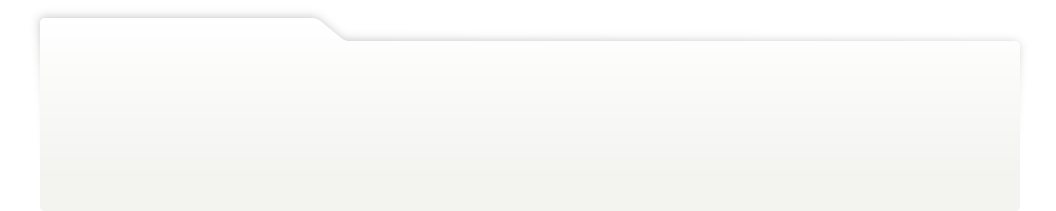
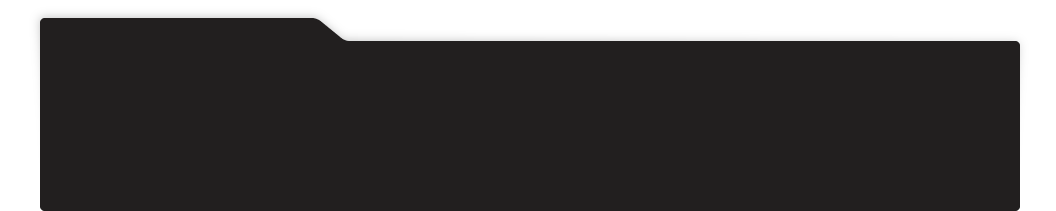
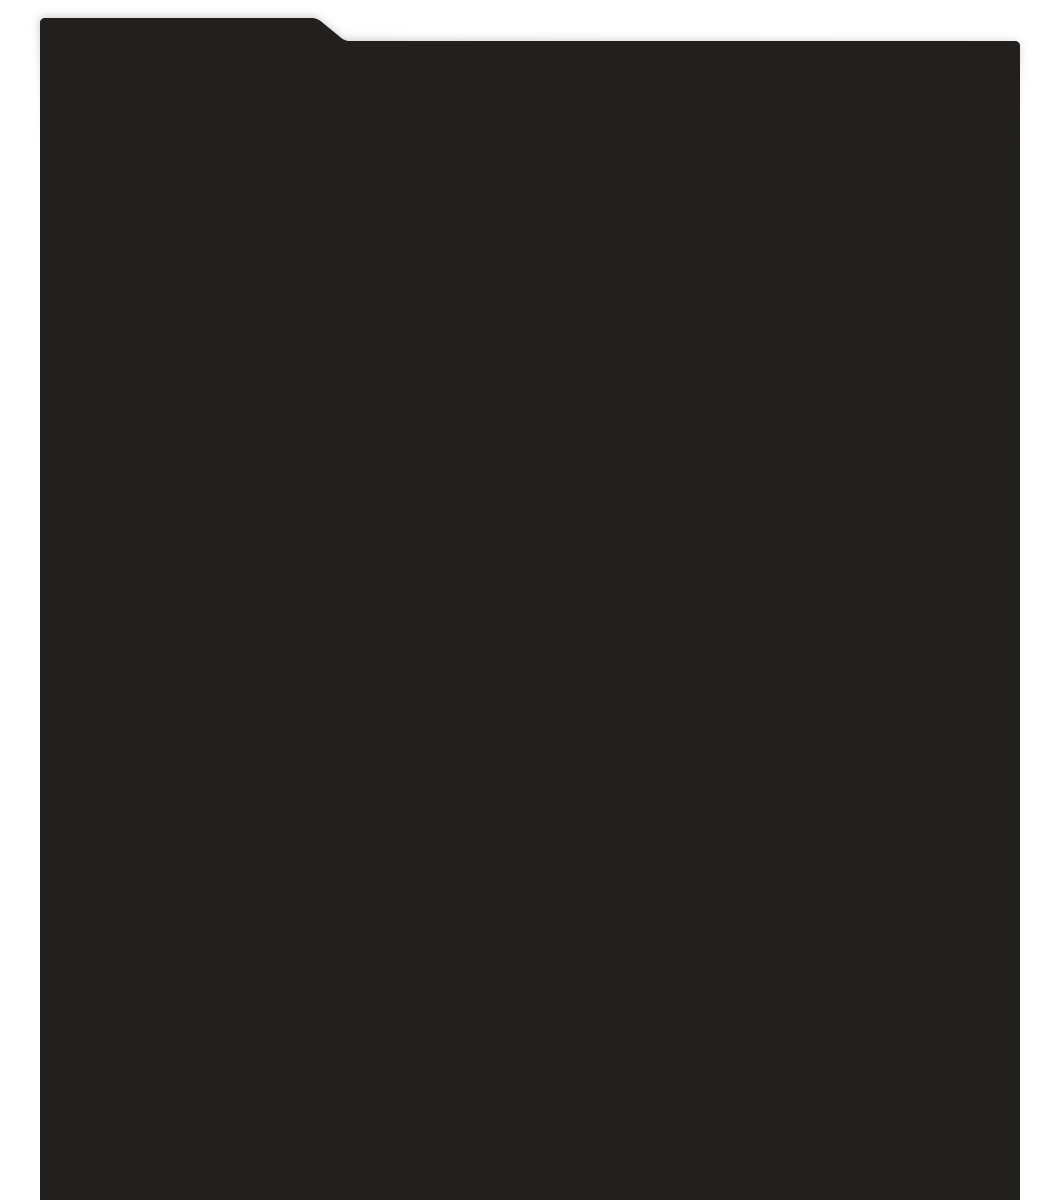
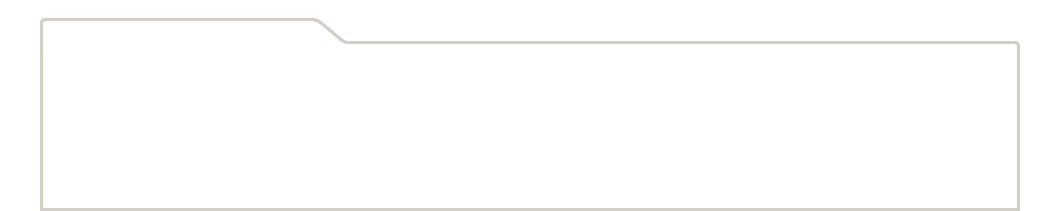
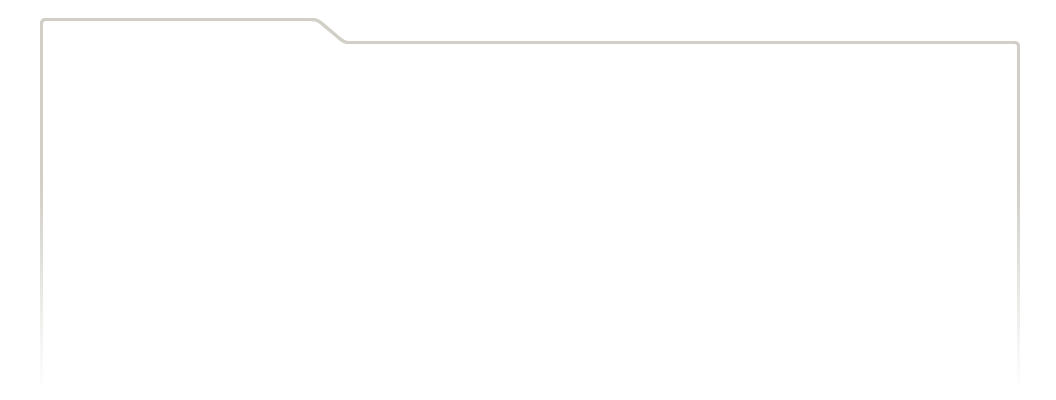
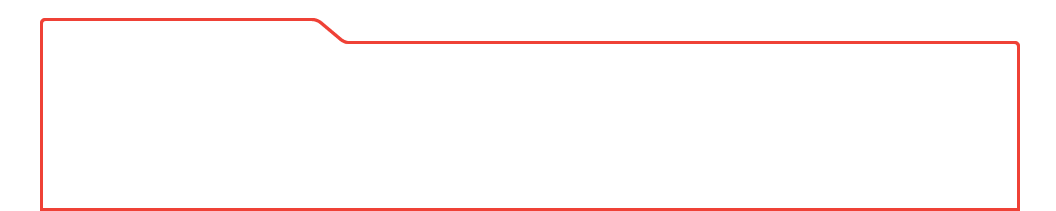
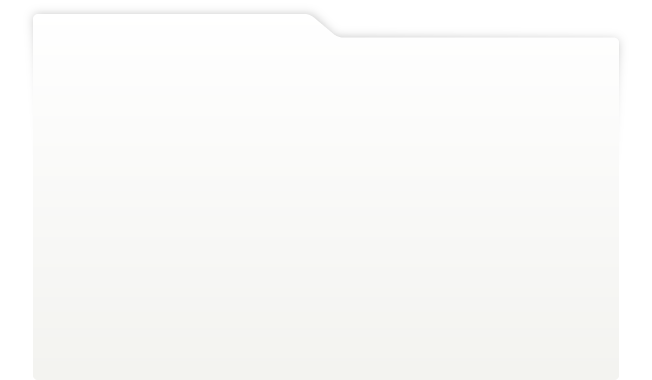
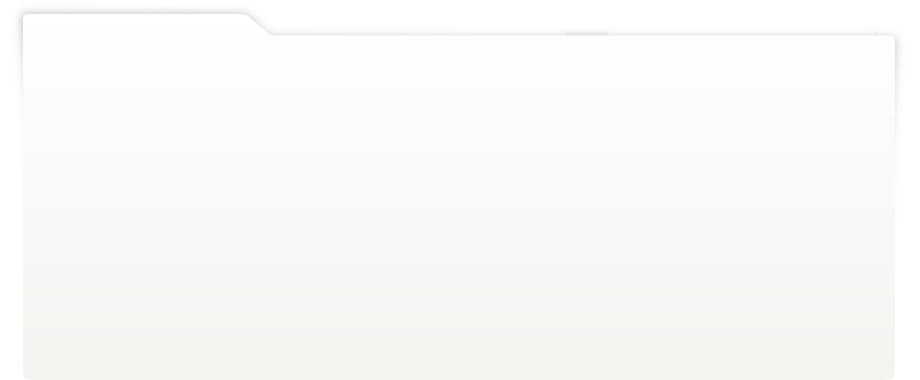
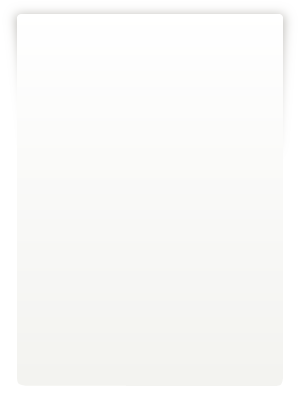
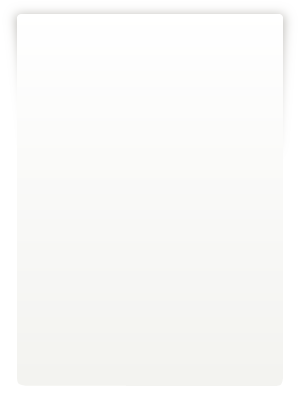
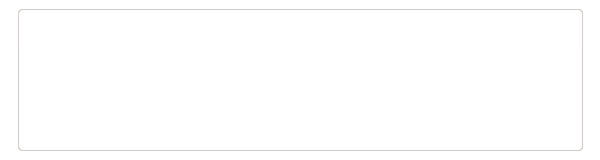
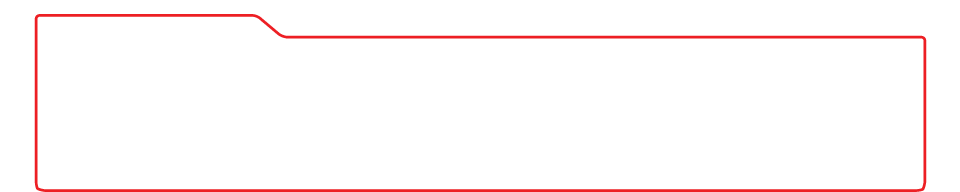
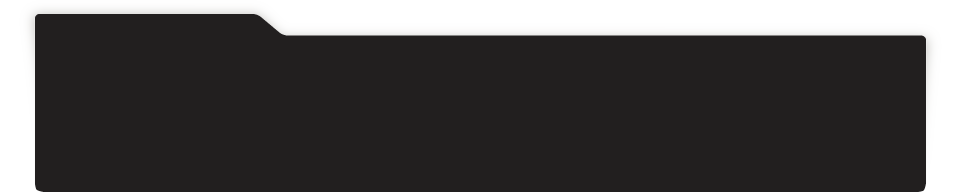
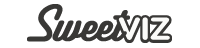
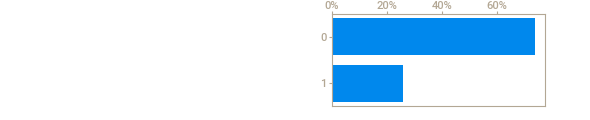
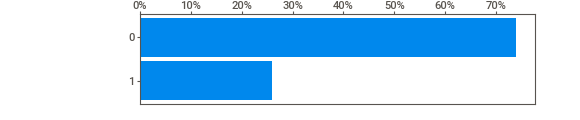
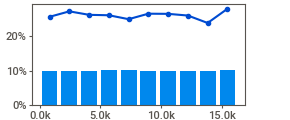
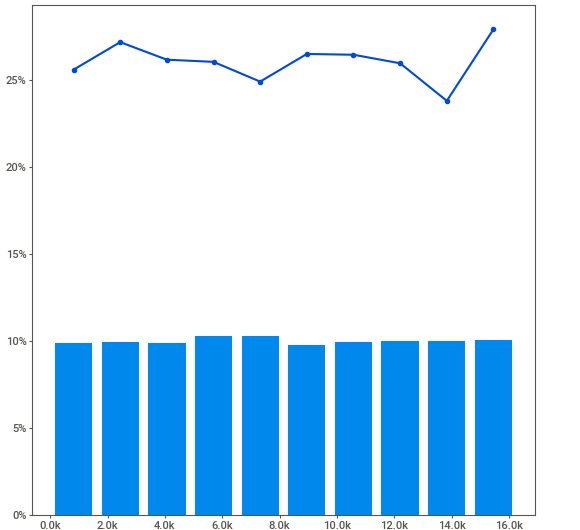
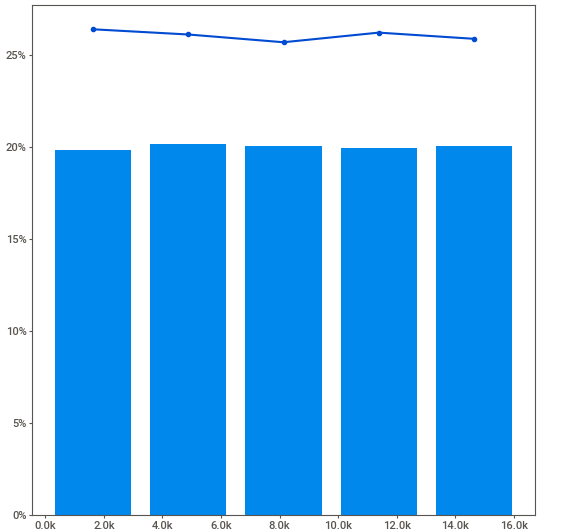
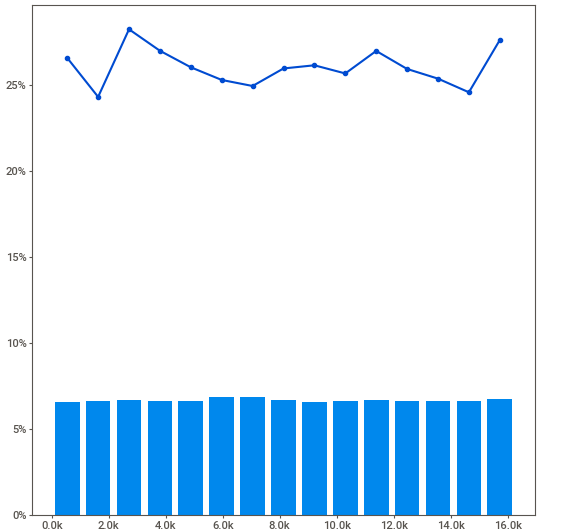
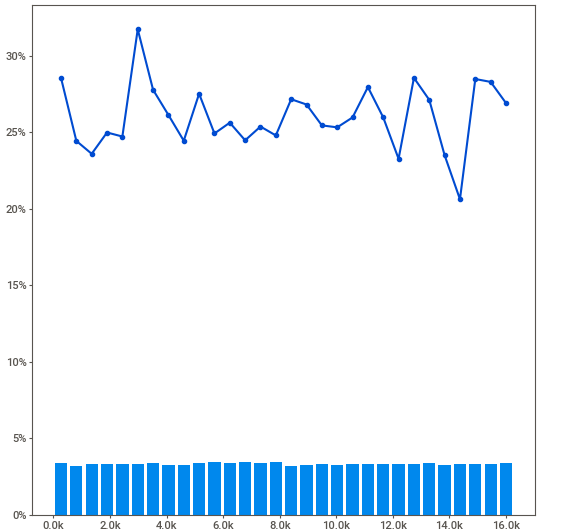
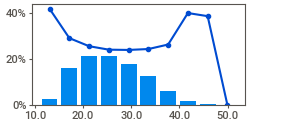
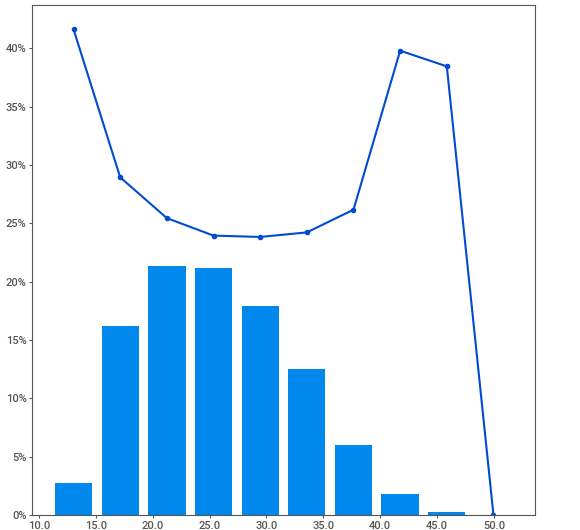
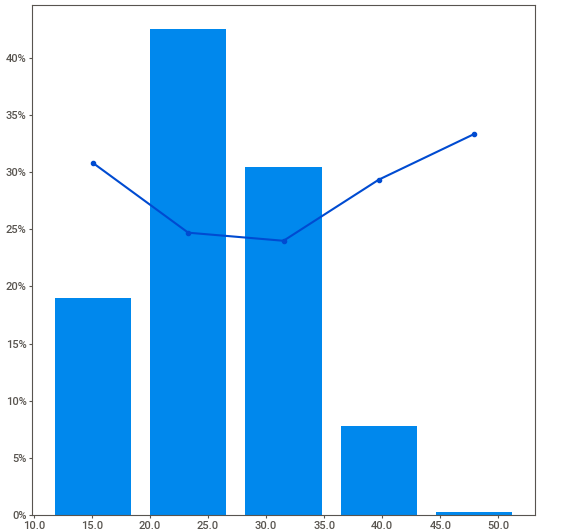
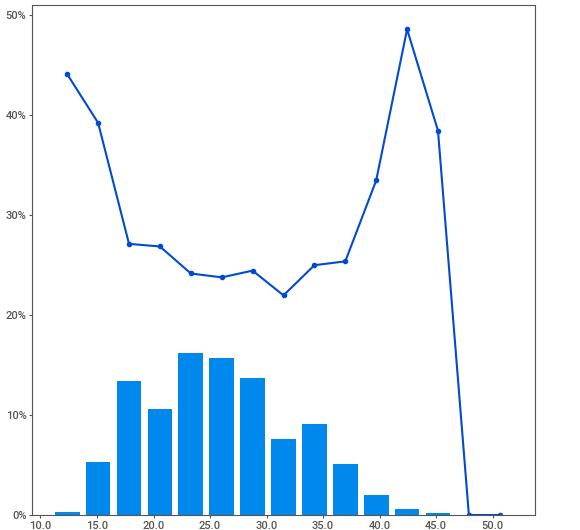
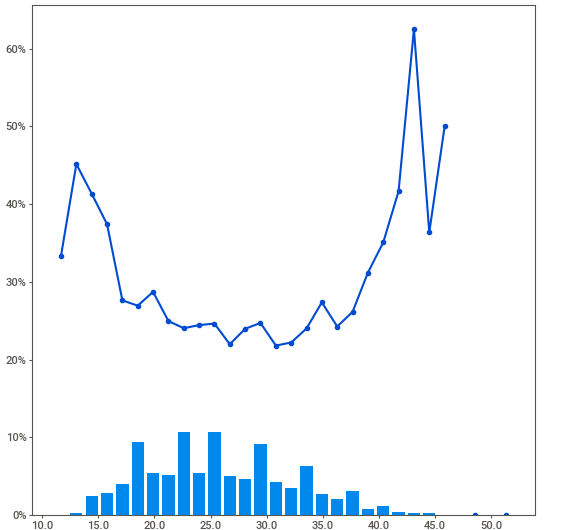
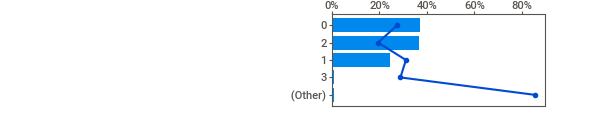
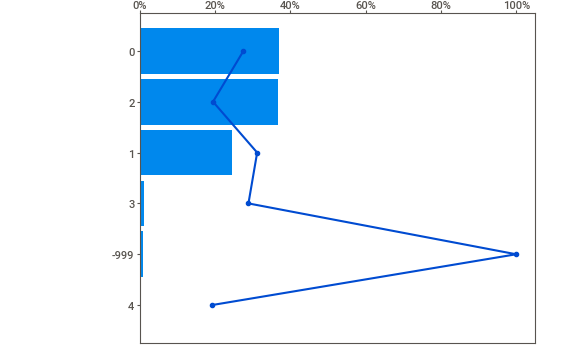
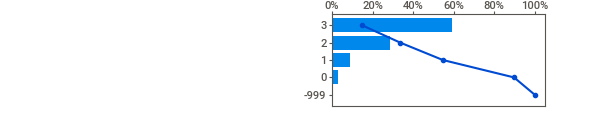
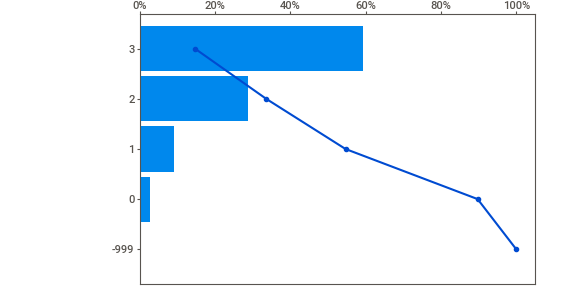
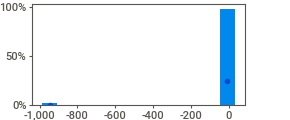
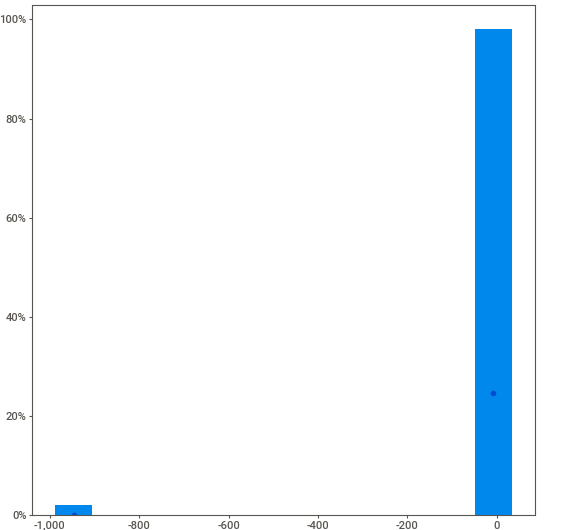
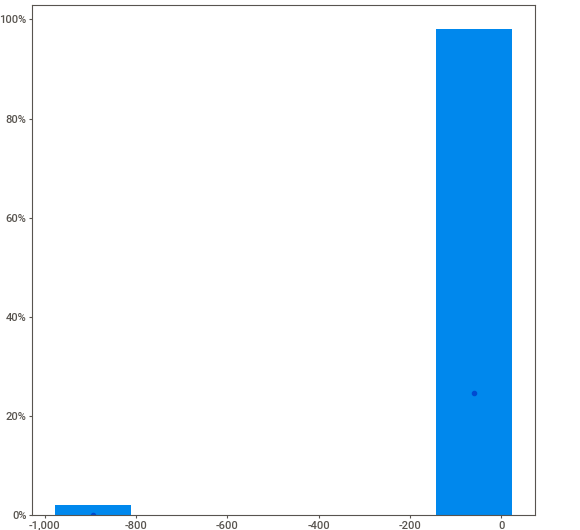
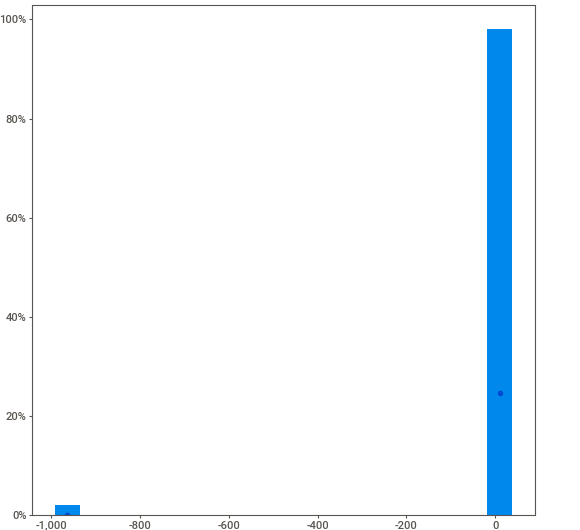
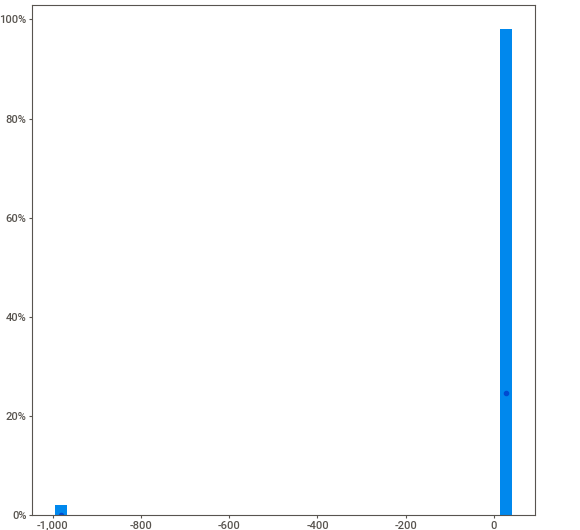
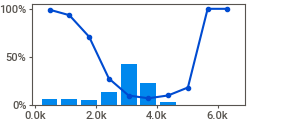
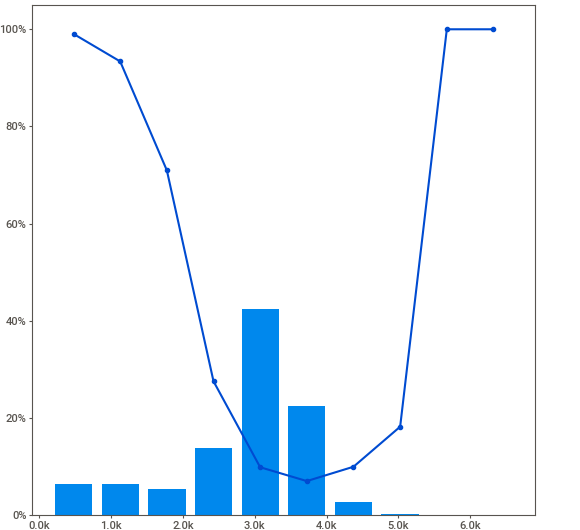
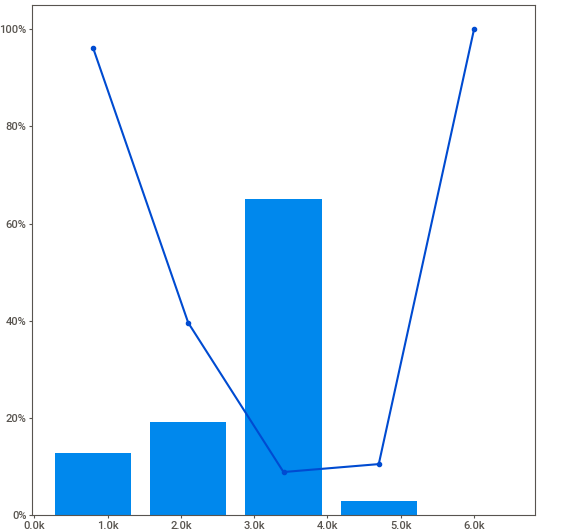
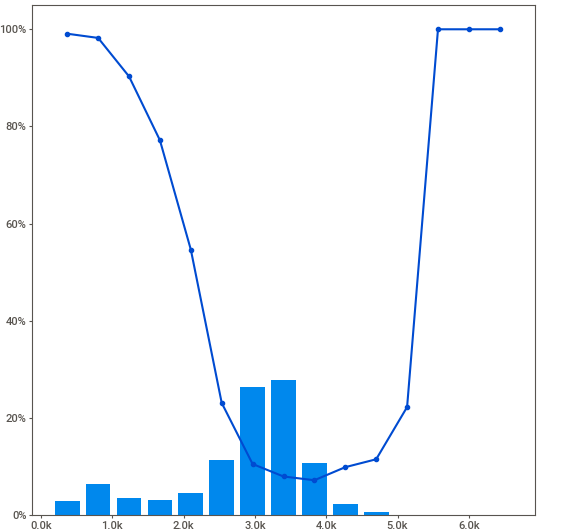
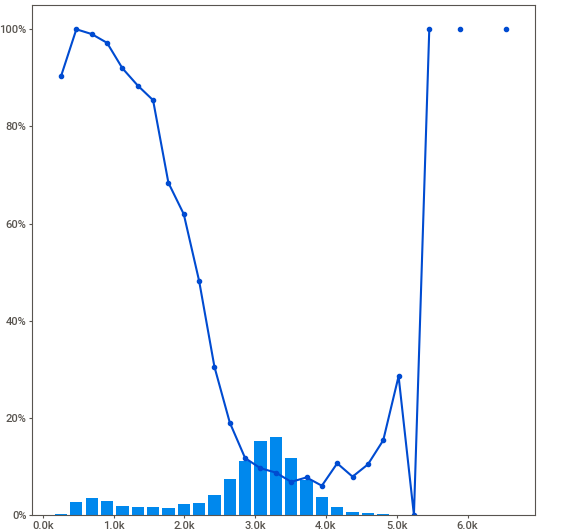
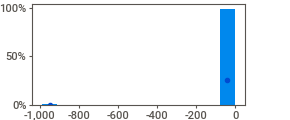
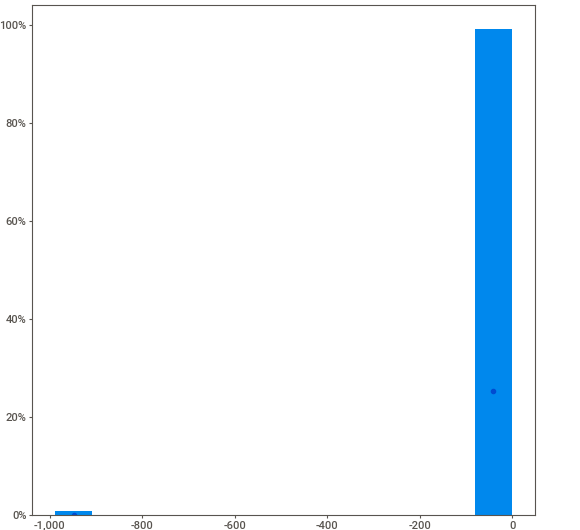
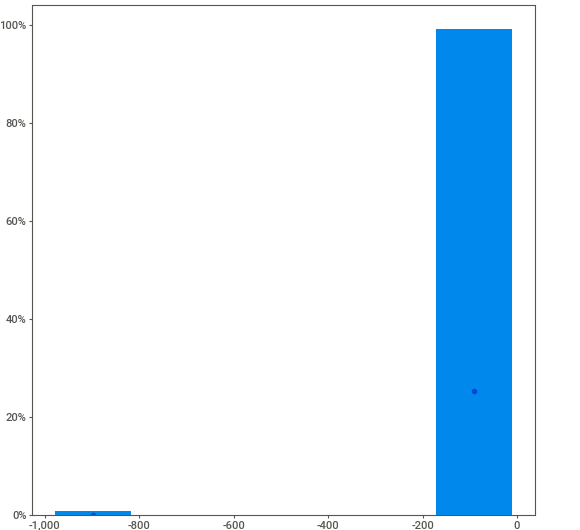
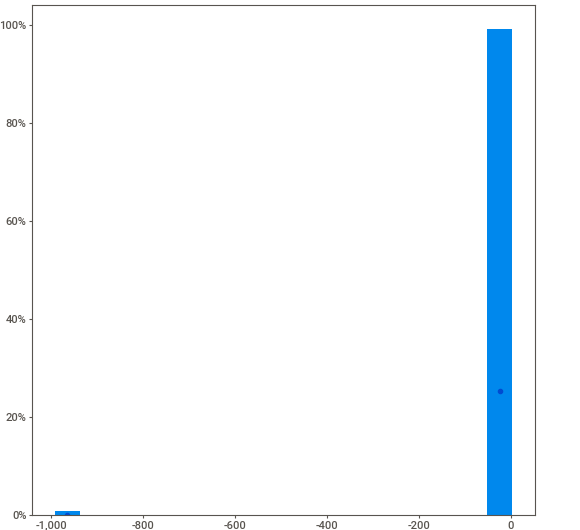
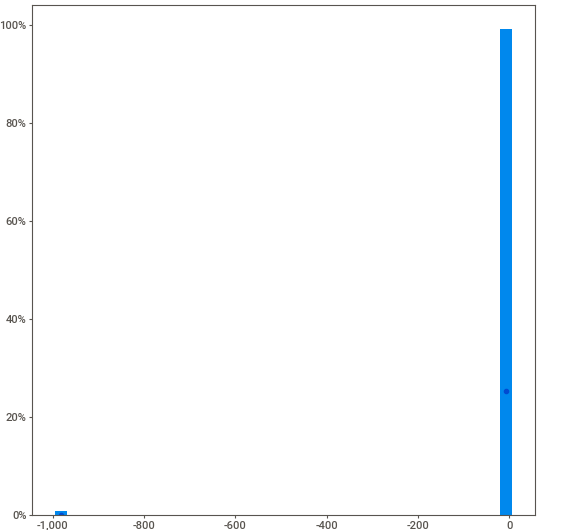
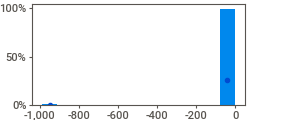
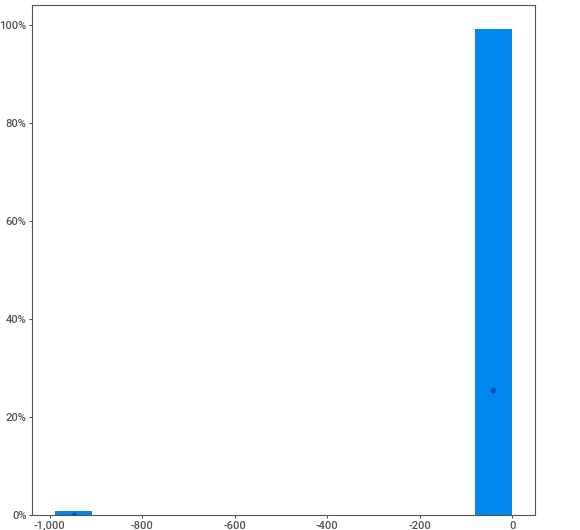
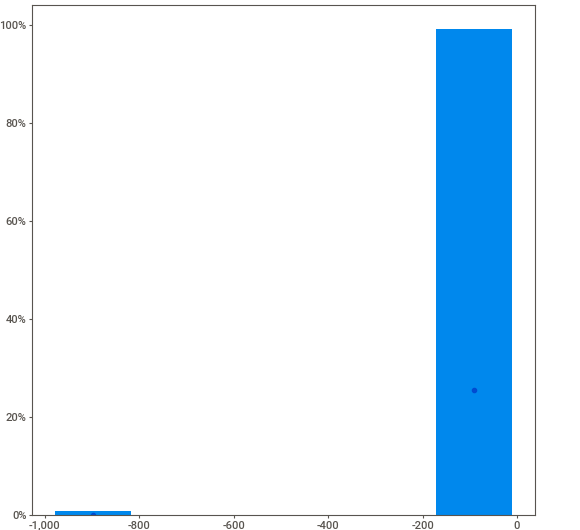
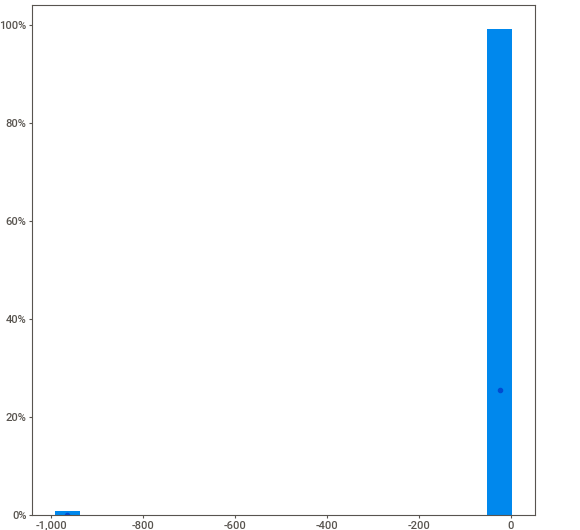
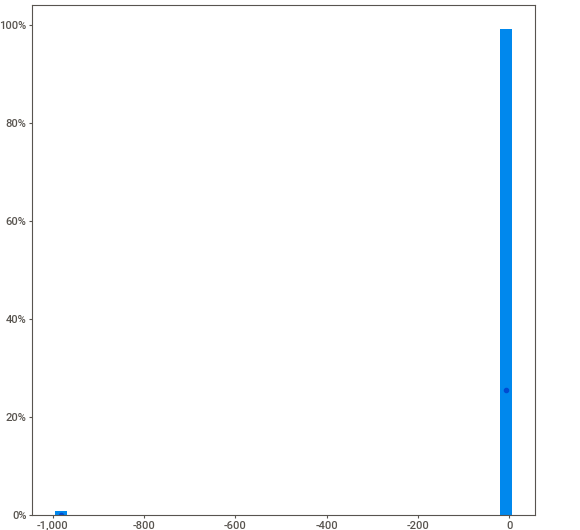
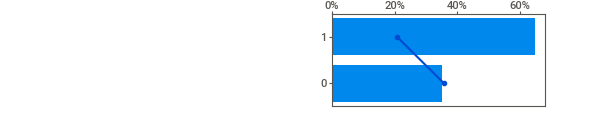
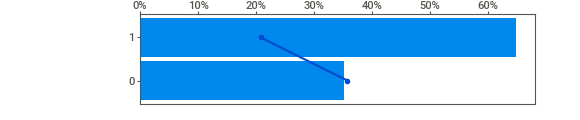
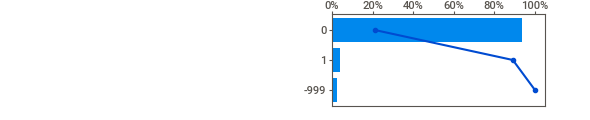
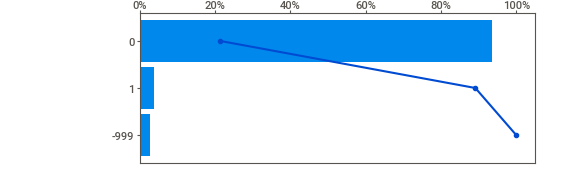
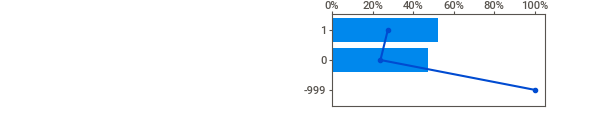
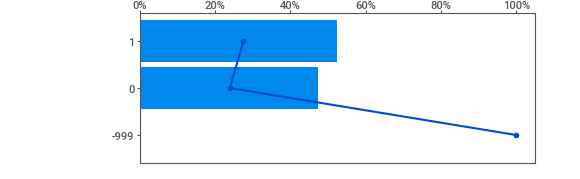
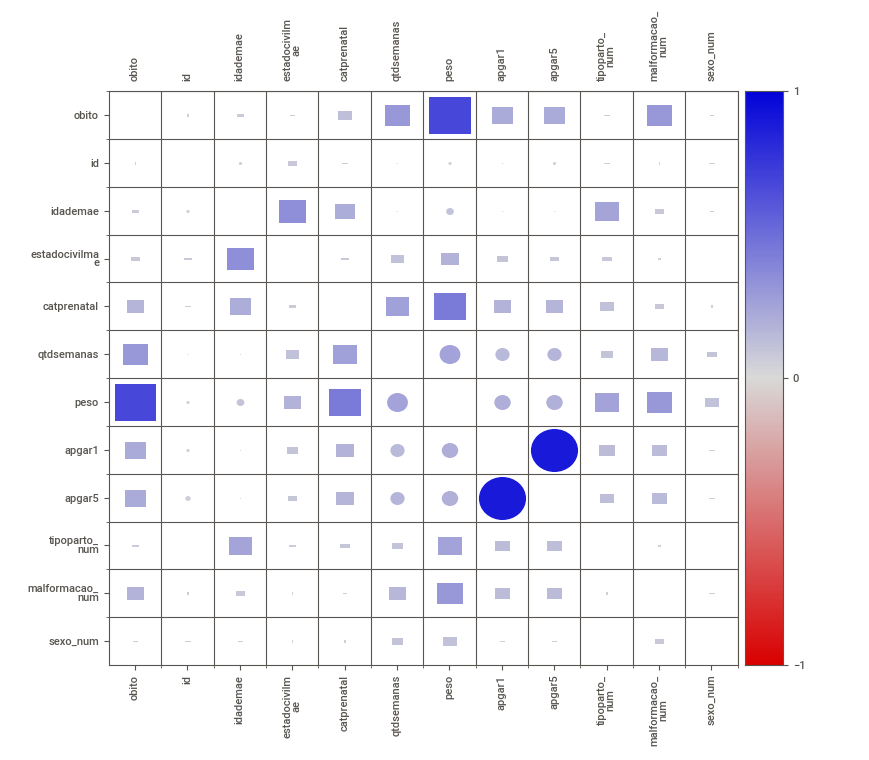
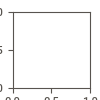

In [ ]:
my_report.show_notebook()

In [ ]:
df_treino['estadocivilmae']=df_treino['estadocivilmae'].astype(int)
df_treino['catprenatal']=df_treino['catprenatal'].astype(int)

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               11389 non-null  int64
 1   idademae         11389 non-null  int64
 2   estadocivilmae   11389 non-null  int64
 3   catprenatal      11389 non-null  int64
 4   qtdsemanas       11389 non-null  int64
 5   peso             11389 non-null  int64
 6   apgar1           11389 non-null  int64
 7   apgar5           11389 non-null  int64
 8   obito            11389 non-null  int64
 9   tipoparto_num    11389 non-null  int64
 10  malformacao_num  11389 non-null  int64
 11  sexo_num         11389 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


# Substituindo faltantes

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_treino = []
for i in df_treino.index:
  resp = df_treino['estadocivilmae'].iloc[i]
  if resp == -999:
    indices_treino.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_treino.drop(indices_treino)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11293 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               11293 non-null  int64
 1   idademae         11293 non-null  int64
 2   estadocivilmae   11293 non-null  int64
 3   catprenatal      11293 non-null  int64
 4   qtdsemanas       11293 non-null  int64
 5   peso             11293 non-null  int64
 6   apgar1           11293 non-null  int64
 7   apgar5           11293 non-null  int64
 8   obito            11293 non-null  int64
 9   tipoparto_num    11293 non-null  int64
 10  malformacao_num  11293 non-null  int64
 11  sexo_num         11293 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','estadocivilmae'])
y = df_sem_999.iloc[:,2]

In [ ]:
#y=y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

0    3378
2    3344
1    2210
3      84
4      18
Name: estadocivilmae, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
from sklearn.metrics import classification_report
# Principais métricas de performance
print(classification_report(y_teste, resultado_clr))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       836
           1       0.25      0.18      0.21       574
           2       0.50      0.57      0.53       819
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         3

    accuracy                           0.44      2259
   macro avg       0.24      0.25      0.24      2259
weighted avg       0.41      0.44      0.42      2259



In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_treino = df_treino.iloc[indices_treino]

In [ ]:
X_test = df_com_999_treino.drop(columns=['id','estadocivilmae'])

In [ ]:
y_predict_treino = RF.predict(X_test)

In [ ]:
y_predict_treino

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 2, 0])

In [ ]:
df_com_999_treino['estadocivilmae'] = y_predict_treino


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_treino.index:
  df_treino.estadocivilmae[i] = round(df_com_999_treino.estadocivilmae[i])

# Dados de teste

In [ ]:
df_teste.drop(columns=['tipoparto','malformacao','sexo'],inplace=True)

In [ ]:
df_teste['estadocivilmae']=df_teste['estadocivilmae'].astype(int)
df_teste['catprenatal']=df_teste['catprenatal'].astype(int)

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               4882 non-null   int64
 1   idademae         4882 non-null   int64
 2   estadocivilmae   4882 non-null   int64
 3   catprenatal      4882 non-null   int64
 4   qtdsemanas       4882 non-null   int64
 5   peso             4882 non-null   int64
 6   apgar1           4882 non-null   int64
 7   apgar5           4882 non-null   int64
 8   tipoparto_num    4882 non-null   int64
 9   malformacao_num  4882 non-null   int64
 10  sexo_num         4882 non-null   int64
dtypes: int64(11)
memory usage: 419.7 KB


In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_teste = []
for i in df_teste.index:
  resp = df_teste['estadocivilmae'].iloc[i]
  if resp == -999:
    indices_teste.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_teste.drop(indices_teste)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4844 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               4844 non-null   int64
 1   idademae         4844 non-null   int64
 2   estadocivilmae   4844 non-null   int64
 3   catprenatal      4844 non-null   int64
 4   qtdsemanas       4844 non-null   int64
 5   peso             4844 non-null   int64
 6   apgar1           4844 non-null   int64
 7   apgar5           4844 non-null   int64
 8   tipoparto_num    4844 non-null   int64
 9   malformacao_num  4844 non-null   int64
 10  sexo_num         4844 non-null   int64
dtypes: int64(11)
memory usage: 454.1 KB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','estadocivilmae'])
y = df_sem_999.iloc[:,2]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

2    1434
0    1426
1     954
3      54
4       7
Name: estadocivilmae, dtype: int64

In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
from sklearn.metrics import classification_report
# Principais métricas de performance
print(classification_report(y_teste, resultado_clr))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47       364
           1       0.28      0.19      0.23       229
           2       0.48      0.56      0.52       357
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         5

    accuracy                           0.44       969
   macro avg       0.24      0.25      0.24       969
weighted avg       0.41      0.44      0.42       969



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_teste = df_teste.iloc[indices_teste]

In [ ]:
X_test = df_com_999_teste.drop(columns=['id','estadocivilmae'])

In [ ]:
y_predict_teste = RF.predict(X_test)

In [ ]:
y_predict_teste

array([0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
df_com_999_teste['estadocivilmae'] = y_predict_teste


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_teste.index:
  df_teste.estadocivilmae[i] = round(df_com_999_teste.estadocivilmae[i])

## Catprenatal

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_treino = []
for i in df_treino.index:
  resp = df_treino['catprenatal'].iloc[i]
  if resp == -999:
    indices_treino.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_treino.drop(indices_treino)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11349 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               11349 non-null  int64
 1   idademae         11349 non-null  int64
 2   estadocivilmae   11349 non-null  int64
 3   catprenatal      11349 non-null  int64
 4   qtdsemanas       11349 non-null  int64
 5   peso             11349 non-null  int64
 6   apgar1           11349 non-null  int64
 7   apgar5           11349 non-null  int64
 8   obito            11349 non-null  int64
 9   tipoparto_num    11349 non-null  int64
 10  malformacao_num  11349 non-null  int64
 11  sexo_num         11349 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','catprenatal'])
y = df_sem_999.iloc[:,3]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

3    5355
2    2645
1     828
0     251
Name: catprenatal, dtype: int64

In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
from sklearn.metrics import classification_report
# Principais métricas de performance
print(classification_report(y_teste, resultado_clr))

              precision    recall  f1-score   support

           0       0.29      0.07      0.11        61
           1       0.22      0.11      0.14       197
           2       0.40      0.34      0.37       616
           3       0.71      0.84      0.77      1396

    accuracy                           0.62      2270
   macro avg       0.40      0.34      0.35      2270
weighted avg       0.57      0.62      0.59      2270



In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_treino = df_treino.iloc[indices_treino]

In [ ]:
X_test = df_com_999_treino.drop(columns=['id','catprenatal'])

In [ ]:
y_predict_treino = RF.predict(X_test)

In [ ]:
y_predict_treino

array([2, 0, 1, 1, 1, 2, 0, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 0, 1, 3, 3, 3, 2, 1, 3, 2, 1, 2, 1, 3, 2, 2])

In [ ]:
df_com_999_treino['catprenatal'] = y_predict_treino


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_treino.index:
  df_treino.catprenatal[i] = round(df_com_999_treino.catprenatal[i])

# Dados de teste

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_teste = []
for i in df_teste.index:
  resp = df_teste['catprenatal'].iloc[i]
  if resp == -999:
    indices_teste.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_teste.drop(indices_teste)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4869 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               4869 non-null   int64
 1   idademae         4869 non-null   int64
 2   estadocivilmae   4869 non-null   int64
 3   catprenatal      4869 non-null   int64
 4   qtdsemanas       4869 non-null   int64
 5   peso             4869 non-null   int64
 6   apgar1           4869 non-null   int64
 7   apgar5           4869 non-null   int64
 8   tipoparto_num    4869 non-null   int64
 9   malformacao_num  4869 non-null   int64
 10  sexo_num         4869 non-null   int64
dtypes: int64(11)
memory usage: 456.5 KB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','catprenatal'])
y = df_sem_999.iloc[:,3]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

3    2282
2    1114
1     382
0     117
Name: catprenatal, dtype: int64

In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
from sklearn.metrics import classification_report
# Principais métricas de performance
print(classification_report(y_teste, resultado_clr))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        30
           1       0.39      0.24      0.29        89
           2       0.42      0.33      0.37       272
           3       0.71      0.85      0.78       583

    accuracy                           0.63       974
   macro avg       0.44      0.37      0.39       974
weighted avg       0.59      0.63      0.60       974



In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_teste = df_teste.iloc[indices_teste]

In [ ]:
X_test = df_com_999_teste.drop(columns=['id','catprenatal'])

In [ ]:
y_predict_teste = RF.predict(X_test)

In [ ]:
y_predict_teste

array([0, 2, 0, 2, 3, 3, 2, 1, 2, 2, 3, 2, 2])

In [ ]:
df_com_999_teste['catprenatal'] = y_predict_teste


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_teste.index:
  df_teste.catprenatal[i] = round(df_com_999_teste.catprenatal[i])

In [ ]:
y.value_counts()

3    2865
2    1386
1     471
0     147
Name: catprenatal, dtype: int64

# Quantidade de semanas

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_treino = []
for i in df_treino.index:
  resp = df_treino['qtdsemanas'].iloc[i]
  if resp == -999:
    indices_treino.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_treino.drop(indices_treino)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11163 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               11163 non-null  int64
 1   idademae         11163 non-null  int64
 2   estadocivilmae   11163 non-null  int64
 3   catprenatal      11163 non-null  int64
 4   qtdsemanas       11163 non-null  int64
 5   peso             11163 non-null  int64
 6   apgar1           11163 non-null  int64
 7   apgar5           11163 non-null  int64
 8   obito            11163 non-null  int64
 9   tipoparto_num    11163 non-null  int64
 10  malformacao_num  11163 non-null  int64
 11  sexo_num         11163 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','qtdsemanas'])
y = df_sem_999.iloc[:,4]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

39    2265
38    1800
40    1233
37     727
41     534
36     408
35     254
34     171
42     136
28     136
32     129
33     125
30     111
24     110
27     107
26     106
31     105
29      96
25      91
23      85
22      55
43      43
21      33
20      27
44      22
19      12
45       9
Name: qtdsemanas, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=400,random_state=0)
RF.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
resultado_clr = np.round(resultado_clr,0)

In [ ]:
from sklearn.metrics import r2_score
# Principais métricas de performance
r2_score(y_teste, resultado_clr)

0.7722940779077001

In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_treino = df_treino.iloc[indices_treino]

In [ ]:
X_test = df_com_999_treino.drop(columns=['id','qtdsemanas'])

In [ ]:
y_predict_treino = RF.predict(X_test)

In [ ]:
y_predict_treino = np.round(y_predict_treino,0)

In [ ]:
df_com_999_treino['qtdsemanas'] = y_predict_treino


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_treino.index:
  df_treino.qtdsemanas[i] = round(df_com_999_treino.qtdsemanas[i])

# Dados de teste

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_teste = []
for i in df_teste.index:
  resp = df_teste['qtdsemanas'].iloc[i]
  if resp == -999:
    indices_teste.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_teste.drop(indices_teste)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4786 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               4786 non-null   int64
 1   idademae         4786 non-null   int64
 2   estadocivilmae   4786 non-null   int64
 3   catprenatal      4786 non-null   int64
 4   qtdsemanas       4786 non-null   int64
 5   peso             4786 non-null   int64
 6   apgar1           4786 non-null   int64
 7   apgar5           4786 non-null   int64
 8   tipoparto_num    4786 non-null   int64
 9   malformacao_num  4786 non-null   int64
 10  sexo_num         4786 non-null   int64
dtypes: int64(11)
memory usage: 448.7 KB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','qtdsemanas'])
y = df_sem_999.iloc[:,4]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

39    935
38    751
40    521
37    360
41    188
36    186
35    114
34     76
42     60
24     59
31     58
33     56
26     55
25     54
28     54
32     45
27     44
30     42
29     41
23     31
22     30
21     19
43     19
20      9
45      8
44      7
19      6
Name: qtdsemanas, dtype: int64

In [ ]:
RF = RandomForestRegressor(n_estimators=400,random_state=0)
RF.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
resultado_clr = np.round(resultado_clr,0)

In [ ]:
# Principais métricas de performance
r2_score(y_teste, resultado_clr)

0.7708018389967344

In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_teste = df_teste.iloc[indices_teste]

In [ ]:
X_test = df_com_999_teste.drop(columns=['id','qtdsemanas'])

In [ ]:
y_predict_teste = RF.predict(X_test)

In [ ]:
y_predict_teste = np.round(y_predict_teste,0)

In [ ]:
df_com_999_teste['qtdsemanas'] = y_predict_teste


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_teste.index:
  df_teste.qtdsemanas[i] = round(df_com_999_teste.qtdsemanas[i])

# Apgar1

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_treino = []
for i in df_treino.index:
  resp = df_treino['apgar1'].iloc[i]
  if resp == -999:
    indices_treino.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_treino.drop(indices_treino)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11289 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               11289 non-null  int64
 1   idademae         11289 non-null  int64
 2   estadocivilmae   11289 non-null  int64
 3   catprenatal      11289 non-null  int64
 4   qtdsemanas       11289 non-null  int64
 5   peso             11289 non-null  int64
 6   apgar1           11289 non-null  int64
 7   apgar5           11289 non-null  int64
 8   obito            11289 non-null  int64
 9   tipoparto_num    11289 non-null  int64
 10  malformacao_num  11289 non-null  int64
 11  sexo_num         11289 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','apgar1'])
y = df_sem_999.iloc[:,6]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

9     3872
8     2190
7      697
10     401
6      389
1      340
2      280
3      275
5      262
4      245
0       80
Name: apgar1, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=400,random_state=0)
RF.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
resultado_clr = np.round(resultado_clr,0)

In [ ]:
from sklearn.metrics import r2_score
# Principais métricas de performance
r2_score(y_teste, resultado_clr)

0.8256379762625976

In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_treino = df_treino.iloc[indices_treino]

In [ ]:
X_test = df_com_999_treino.drop(columns=['id','apgar1'])

In [ ]:
y_predict_treino = RF.predict(X_test)

In [ ]:
y_predict_treino = np.round(y_predict_treino,0)

In [ ]:
df_com_999_treino['apgar1'] = y_predict_treino


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_treino.index:
  df_treino.apgar1[i] = round(df_com_999_treino.apgar1[i])

# Dados de teste

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_teste = []
for i in df_teste.index:
  resp = df_teste['apgar1'].iloc[i]
  if resp == -999:
    indices_teste.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_teste.drop(indices_teste)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               4834 non-null   int64
 1   idademae         4834 non-null   int64
 2   estadocivilmae   4834 non-null   int64
 3   catprenatal      4834 non-null   int64
 4   qtdsemanas       4834 non-null   int64
 5   peso             4834 non-null   int64
 6   apgar1           4834 non-null   int64
 7   apgar5           4834 non-null   int64
 8   tipoparto_num    4834 non-null   int64
 9   malformacao_num  4834 non-null   int64
 10  sexo_num         4834 non-null   int64
dtypes: int64(11)
memory usage: 453.2 KB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','apgar1'])
y = df_sem_999.iloc[:,6]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

9     1689
8      901
7      298
10     168
6      168
2      146
1      135
5      118
3      117
4       90
0       37
Name: apgar1, dtype: int64

In [ ]:
RF = RandomForestRegressor(n_estimators=400,random_state=0)
RF.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
resultado_clr = np.round(resultado_clr,0)

In [ ]:
# Principais métricas de performance
r2_score(y_teste, resultado_clr)

0.8191765759302964

In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_teste = df_teste.iloc[indices_teste]

In [ ]:
X_test = df_com_999_teste.drop(columns=['id','apgar1'])

In [ ]:
y_predict_teste = RF.predict(X_test)

In [ ]:
y_predict_teste = np.round(y_predict_teste,0)

In [ ]:
df_com_999_teste['apgar1'] = y_predict_teste


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_teste.index:
  df_teste.apgar1[i] = round(df_com_999_teste.apgar1[i])

# Apgar5

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_treino = []
for i in df_treino.index:
  resp = df_treino['apgar5'].iloc[i]
  if resp == -999:
    indices_treino.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_treino.drop(indices_treino)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11388
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               11294 non-null  int64
 1   idademae         11294 non-null  int64
 2   estadocivilmae   11294 non-null  int64
 3   catprenatal      11294 non-null  int64
 4   qtdsemanas       11294 non-null  int64
 5   peso             11294 non-null  int64
 6   apgar1           11294 non-null  int64
 7   apgar5           11294 non-null  int64
 8   obito            11294 non-null  int64
 9   tipoparto_num    11294 non-null  int64
 10  malformacao_num  11294 non-null  int64
 11  sexo_num         11294 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','apgar5'])
y = df_sem_999.iloc[:,7]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

10    4412
9     2503
8      716
7      379
6      234
5      176
1      159
4      145
3      116
0      100
2       95
Name: apgar5, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=400,random_state=0)
RF.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
resultado_clr = np.round(resultado_clr,0)

In [ ]:
from sklearn.metrics import r2_score
# Principais métricas de performance
r2_score(y_teste, resultado_clr)

0.7923978090648481

In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_treino = df_treino.iloc[indices_treino]

In [ ]:
X_test = df_com_999_treino.drop(columns=['id','apgar5'])

In [ ]:
y_predict_treino = RF.predict(X_test)

In [ ]:
y_predict_treino = np.round(y_predict_treino,0)

In [ ]:
df_com_999_treino['apgar5'] = y_predict_treino


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_treino.index:
  df_treino.apgar5[i] = round(df_com_999_treino.apgar5[i])

# Dados de teste

In [ ]:
#Índices onde ocorrem os valores faltantes:
indices_teste = []
for i in df_teste.index:
  resp = df_teste['apgar5'].iloc[i]
  if resp == -999:
    indices_teste.append(i)

In [ ]:
#Dropar para posterior predição os dados com -999
df_sem_999 = df_teste.drop(indices_teste)

In [ ]:
df_sem_999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 0 to 4881
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               4833 non-null   int64
 1   idademae         4833 non-null   int64
 2   estadocivilmae   4833 non-null   int64
 3   catprenatal      4833 non-null   int64
 4   qtdsemanas       4833 non-null   int64
 5   peso             4833 non-null   int64
 6   apgar1           4833 non-null   int64
 7   apgar5           4833 non-null   int64
 8   tipoparto_num    4833 non-null   int64
 9   malformacao_num  4833 non-null   int64
 10  sexo_num         4833 non-null   int64
dtypes: int64(11)
memory usage: 453.1 KB


In [ ]:
#Separando os features e os targets
X = df_sem_999.drop(columns=['id','apgar5'])
y = df_sem_999.iloc[:,7]

In [ ]:
#y=y.astype('int')

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y_treino.value_counts()

10    1903
9     1010
8      323
7      179
6      106
5       88
1       74
3       52
4       50
2       42
0       39
Name: apgar5, dtype: int64

In [ ]:
RF = RandomForestRegressor(n_estimators=400,random_state=0)
RF.fit(X_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Fazendo a predição nos dados de treino
resultado_clr = RF.predict(X_teste)

In [ ]:
resultado_clr = np.round(resultado_clr,0)

In [ ]:
# Principais métricas de performance
r2_score(y_teste, resultado_clr)

0.8017297074378211

In [ ]:
#Pegando agora os dados com -999 para testar o modelo e fazer as previsões
df_com_999_teste = df_teste.iloc[indices_teste]

In [ ]:
X_test = df_com_999_teste.drop(columns=['id','apgar5'])

In [ ]:
y_predict_teste = RF.predict(X_test)

In [ ]:
y_predict_teste = np.round(y_predict_teste,0)

In [ ]:
df_com_999_teste['apgar5'] = y_predict_teste


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in df_com_999_teste.index:
  df_teste.apgar5[i] = round(df_com_999_teste.apgar5[i])

# Voltar e tratar dos dados

In [ ]:
for i in df_treino.index:
  xx = df_treino.iloc[i,2]
  if xx == 0:
    df_treino['estadocivilmae'][i] = 'solteira'
  elif xx == 1:
    df_treino['estadocivilmae'][i] = 'uniao'
  elif xx == 2:
    df_treino['estadocivilmae'][i] = 'casada'
  elif xx == 3:
    df_treino['estadocivilmae'][i] = 'separada'
  elif xx == 4:
    df_treino['estadocivilmae'][i] = 'viuva'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
for i in df_teste.index:
  xx = df_teste.iloc[i,2]
  if xx == 0:
    df_teste['estadocivilmae'][i] = 'solteira'
  elif xx == 1:
    df_teste['estadocivilmae'][i] = 'uniao'
  elif xx == 2:
    df_teste['estadocivilmae'][i] = 'casada'
  elif xx == 3:
    df_teste['estadocivilmae'][i] = 'separada'
  elif xx == 4:
    df_teste['estadocivilmae'][i] = 'viuva'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
df_treino = pd.get_dummies(df_treino,columns=['estadocivilmae'])
df_teste = pd.get_dummies(df_teste,columns=['estadocivilmae'])

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       11389 non-null  int64
 1   idademae                 11389 non-null  int64
 2   catprenatal              11389 non-null  int64
 3   qtdsemanas               11389 non-null  int64
 4   peso                     11389 non-null  int64
 5   apgar1                   11389 non-null  int64
 6   apgar5                   11389 non-null  int64
 7   obito                    11389 non-null  int64
 8   tipoparto_num            11389 non-null  int64
 9   malformacao_num          11389 non-null  int64
 10  sexo_num                 11389 non-null  int64
 11  estadocivilmae_casada    11389 non-null  uint8
 12  estadocivilmae_separada  11389 non-null  uint8
 13  estadocivilmae_solteira  11389 non-null  uint8
 14  estadocivilmae_uniao     11389 non-null  uint8
 15  es

In [ ]:
#df_treino['catprenatal']=df_treino['catprenatal'].astype('int')

In [ ]:
#df_teste['catprenatal']=df_teste['catprenatal'].astype('int')

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       11389 non-null  int64
 1   idademae                 11389 non-null  int64
 2   catprenatal              11389 non-null  int64
 3   qtdsemanas               11389 non-null  int64
 4   peso                     11389 non-null  int64
 5   apgar1                   11389 non-null  int64
 6   apgar5                   11389 non-null  int64
 7   obito                    11389 non-null  int64
 8   tipoparto_num            11389 non-null  int64
 9   malformacao_num          11389 non-null  int64
 10  sexo_num                 11389 non-null  int64
 11  estadocivilmae_casada    11389 non-null  uint8
 12  estadocivilmae_separada  11389 non-null  uint8
 13  estadocivilmae_solteira  11389 non-null  uint8
 14  estadocivilmae_uniao     11389 non-null  uint8
 15  es

In [ ]:
X = df_treino.drop(columns=['id','obito'])
y = df_treino['obito']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11389 entries, 0 to 11388
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   idademae                 11389 non-null  int64
 1   catprenatal              11389 non-null  int64
 2   qtdsemanas               11389 non-null  int64
 3   peso                     11389 non-null  int64
 4   apgar1                   11389 non-null  int64
 5   apgar5                   11389 non-null  int64
 6   tipoparto_num            11389 non-null  int64
 7   malformacao_num          11389 non-null  int64
 8   sexo_num                 11389 non-null  int64
 9   estadocivilmae_casada    11389 non-null  uint8
 10  estadocivilmae_separada  11389 non-null  uint8
 11  estadocivilmae_solteira  11389 non-null  uint8
 12  estadocivilmae_uniao     11389 non-null  uint8
 13  estadocivilmae_viuva     11389 non-null  uint8
dtypes: int64(9), uint8(5)
memory usage: 856.5 KB


Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


Variável alvo após o balanceamento:
1    6728
0    6728
dtype: int64 



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


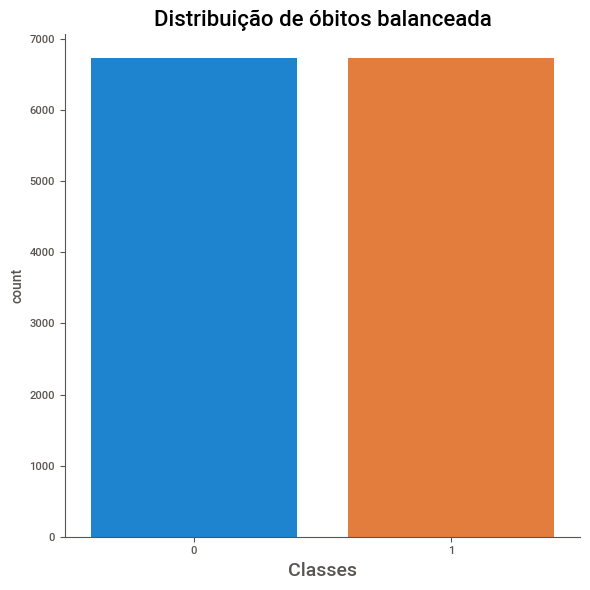

In [ ]:
# Modelo para balancear os dados
# define standard scaler
scaler = StandardScaler()
#transform data
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection, ClusterCentroids
sm = SMOTE(random_state=0,sampling_strategy='minority',k_neighbors=10)
X_und, y_und = sm.fit_resample(X_train, y_train)
#und = RandomUnderSampler(random_state=1,sampling_strategy='majority')
#und = OneSidedSelection(random_state=0,sampling_strategy='majority',n_neighbors=10,n_jobs=-1,n_seeds_S=5)
#und = NearMiss(random_state=0,sampling_strategy='majority',version=1,n_neighbors=10)
#und = ClusterCentroids(random_state=0)
#X_und, y_und = und.fit_resample(X_train, y_train)

# Verificando o balanceamento dos dados
print("Variável alvo após o balanceamento:")
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova distribuição da variável target_default
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(pd.Series(y_und), ax=ax)

sns.despine()

ax.set_title("Distribuição de óbitos balanceada", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
# Número de Features Previsoras
lista=np.arange(1,14)
## Melhor score iniciando em 0
melhor_score=0
## Variável para armazenar o número ótimo de features
nf=0           
## Lista vazia dos scores
lista_score =[]
## Loop
for i in range(len(lista)):
    ## Divisão treino e teste
    #X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_und, y_und, test_size=0.1,random_state=0)
    ## RF
    modelo = XGBClassifier(random_state=0)
    ## RFE
    rfe = RFE(modelo,lista[i])
    ## Fit transform no treino 
    X_treino_rfe = rfe.fit_transform(X_und,y_und)
    X_teste_rfe = rfe.transform(X_test)
    ## Treinando com X_treino_rfe e Y_treino
    modelo.fit(X_treino_rfe,y_und)
    ## Score do treinamento
    #score = modelo.score(X_teste_rfe,Y_teste)
    preds = modelo.predict(X_teste_rfe)
    #score = modelo.score(X_teste_rfe,Y_teste)
    score = roc_auc_score(y_test, preds)
    ## Armazenando resultados na lista vazia
    lista_score.append(score)
    ## Observando o melhor score dentre todos e nº ideal de features
    if(score > melhor_score):
        melhor_score = score
        nf = lista[i]
print("Numero ideal de features: %d" %nf)
print("Score com %d features: %f" % (nf, melhor_score))

Numero ideal de features: 11
Score com 11 features: 0.889567


In [ ]:
## Extraindo colunas dos Previsores
colunas = list(X.columns)
## RF
modelo = XGBClassifier(random_state=0)
## RFE com número ideal de 8 features
rfe = RFE(modelo, nf)             
## fit_transform para os Previsores
Previsores_rfe = rfe.fit_transform(X_und,y_und)  
## Treinando 
modelo.fit(Previsores_rfe,y_und)         
## Pegando as features que foram selecionadas (.support)
temp = pd.Series(rfe.support_,index=colunas)
## Observando as melhores (.index)
features_selecionadas_rfe = temp[temp==True].index
print(features_selecionadas_rfe)

Index(['catprenatal', 'qtdsemanas', 'peso', 'apgar1', 'apgar5',
       'tipoparto_num', 'malformacao_num', 'sexo_num', 'estadocivilmae_casada',
       'estadocivilmae_solteira', 'estadocivilmae_uniao'],
      dtype='object')


In [ ]:
!pip install shap 

     |████████████████████████████████| 371 kB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509243 sha256=c649b6f4a72542a576a26220bc9c71ce29b35dc6d3ad54308bbac31d80c372b3
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
!pip install xgboost

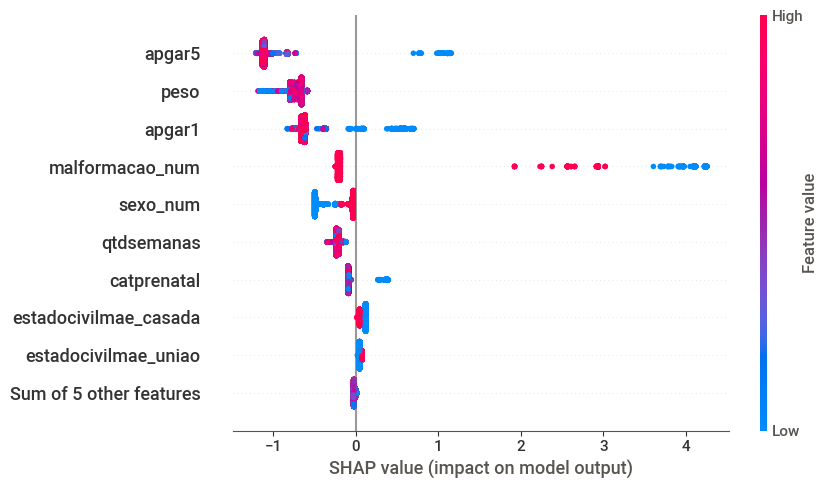

In [ ]:
import shap  # pip install shap
import xgboost as xgb

# Load and train a model
#y = df_nestle2['Situacao_num']
#X = df_nestle2.drop(columns='Situacao_num')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
clf = xgb.XGBClassifier(random_state=0).fit(X_und, y_und)

# Explain model's predictions with SHAP
explainer = shap.Explainer(clf)
shap_values = explainer(X)

# Visualize the predictions' explanation
shap.plots.beeswarm(shap_values)

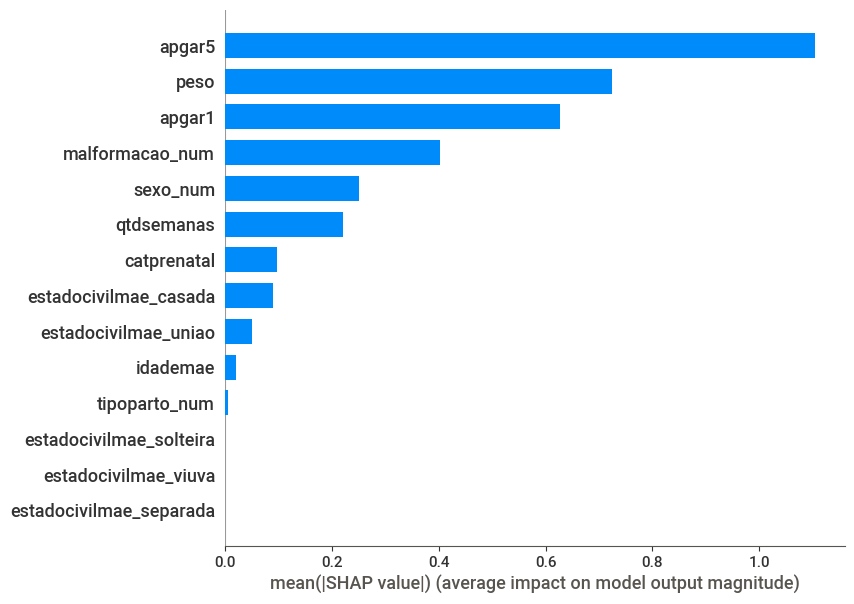

In [ ]:
shap.summary_plot(shap_values, X_und, plot_type="bar")

## Separando as features e o alvo

In [ ]:
'''
X = df_treino[['idademae', 'catprenatal', 'qtdsemanas', 'peso', 'apgar1', 'apgar5',
       'tipoparto_num', 'malformacao_num', 'sexo_num', 'estadocivilmae_casada',
       'estadocivilmae_uniao']]
'''
X = df_treino[['apgar5','peso','apgar1','malformacao_num','sexo_num','qtdsemanas',
               'catprenatal','estadocivilmae_casada','estadocivilmae_uniao','idademae','tipoparto_num']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=0)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Variável alvo após o balanceamento:
1    7580
0    7580
dtype: int64 



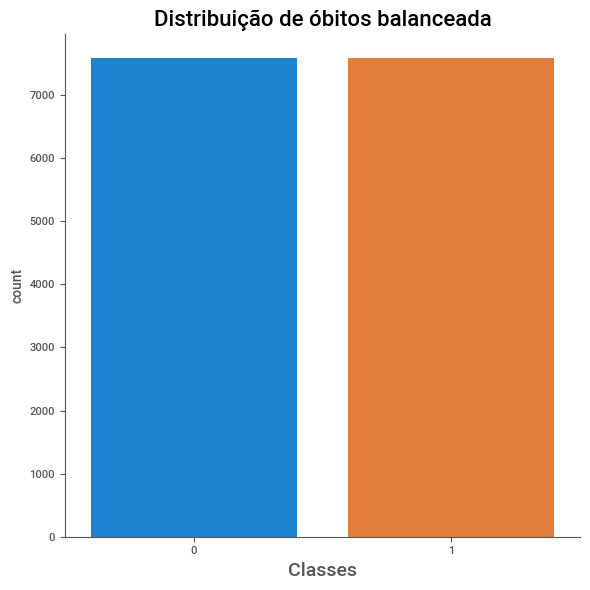

In [ ]:
# Modelo para balancear os dados
# define standard scaler
scaler = StandardScaler()
#transform data
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
sm = SMOTE(random_state=0,sampling_strategy='minority',k_neighbors=10)
X_und, y_und = sm.fit_resample(X_train, y_train)


#und = OneSidedSelection(random_state=0,sampling_strategy='majority',n_neighbors=5,n_jobs=-1,n_seeds_S=5)
#und = NearMiss(random_state=0,sampling_strategy='majority',version=1,n_neighbors=10)
#und = ClusterCentroids(random_state=0)
#und = RandomUnderSampler(random_state=1,sampling_strategy='majority')
#X_und, y_und = und.fit_resample(X_train, y_train)
# Verificando o balanceamento dos dados
print("Variável alvo após o balanceamento:")
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova distribuição da variável target_default
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(pd.Series(y_und), ax=ax)

sns.despine()

ax.set_title("Distribuição de óbitos balanceada", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando os modelos utilizando validação cruzada para 5 k-folds
logreg_balanceado  = cross_validate(LogisticRegression(solver='liblinear',random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
logreg = cross_validate(LogisticRegression(solver='liblinear',random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

trees_balanceado  = cross_validate(DecisionTreeClassifier(random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
trees = cross_validate(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

forest_balanceado  = cross_validate(RandomForestClassifier(random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
forest = cross_validate(RandomForestClassifier(random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

xgb_balanceado  = cross_validate(XGBClassifier(random_state=0), X_und, y_und, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])
xgb = cross_validate(XGBClassifier(random_state=0), X_train, y_train, cv=5, scoring=['f1','accuracy', 'precision', 'recall', 'roc_auc'])

# Gerando um DataFrame com os resultados de cada modelo
summary = pd.DataFrame({
            'labels': ['f1','accuracy', 'precision', 'recall', 'roc_auc'],
            'logreg_balanceado': [logreg_balanceado['test_f1'].mean(),logreg_balanceado['test_accuracy'].mean(), logreg_balanceado['test_precision'].mean(), logreg_balanceado['test_recall'].mean(), logreg_balanceado['test_roc_auc'].mean()],
            'logreg': [logreg['test_f1'].mean(),logreg['test_accuracy'].mean(), logreg['test_precision'].mean(), logreg['test_recall'].mean(), logreg['test_roc_auc'].mean()],
            'trees_balanceado': [trees_balanceado['test_f1'].mean(),trees_balanceado['test_accuracy'].mean(), trees_balanceado['test_precision'].mean(), trees_balanceado['test_recall'].mean(), trees_balanceado['test_roc_auc'].mean()],
            'trees': [trees['test_f1'].mean(),trees['test_accuracy'].mean(), trees['test_precision'].mean(), trees['test_recall'].mean(), trees['test_roc_auc'].mean()],
            'forest_balanceado': [forest_balanceado['test_f1'].mean(),forest_balanceado['test_accuracy'].mean(), forest_balanceado['test_precision'].mean(), forest_balanceado['test_recall'].mean(), forest_balanceado['test_roc_auc'].mean()],
            'forest': [forest['test_f1'].mean(),forest['test_accuracy'].mean(), forest['test_precision'].mean(), forest['test_recall'].mean(), forest['test_roc_auc'].mean()],
            'xgb_balanceado': [xgb_balanceado['test_f1'].mean(),xgb_balanceado['test_accuracy'].mean(), xgb_balanceado['test_precision'].mean(), xgb_balanceado['test_recall'].mean(), xgb_balanceado['test_roc_auc'].mean()],
            'xgb': [xgb['test_f1'].mean(),xgb['test_accuracy'].mean(), xgb['test_precision'].mean(), xgb['test_recall'].mean(), xgb['test_roc_auc'].mean()]           
}).set_index('labels')
summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: green' if x >= 0.75 else '')

,f1,accuracy,precision,recall,roc_auc
logreg_balanceado,0.879258,0.885752,0.932181,0.832058,0.939303
logreg,0.834827,0.920976,0.916006,0.767041,0.936921
trees_balanceado,0.905759,0.907784,0.908703,0.906464,0.907782
trees,0.760044,0.874049,0.754409,0.765918,0.839027
forest_balanceado,0.939397,0.941887,0.956304,0.926253,0.980612
forest,0.845718,0.923902,0.896105,0.800749,0.936464
xgb_balanceado,0.930188,0.933245,0.957679,0.906464,0.974426
xgb,0.850181,0.926732,0.909604,0.798127,0.944804


In [ ]:
#modelo_RF=RandomForestClassifier(random_state=0)
modelo_XGB = XGBClassifier(random_state=0)

In [ ]:
modelo_XGB.fit(X_und,y_und)
#modelo_RF.fit(X_und,y_und)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#preds = modelo_RF.predict(X_test)
preds = modelo_XGB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report=classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       843
           1       0.89      0.82      0.86       296

    accuracy                           0.93      1139
   macro avg       0.92      0.89      0.90      1139
weighted avg       0.93      0.93      0.93      1139



In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

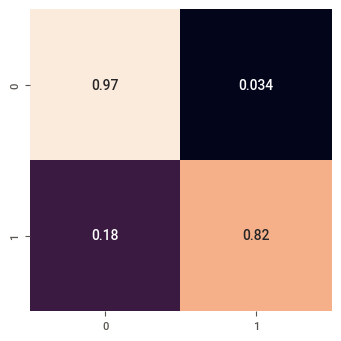

In [ ]:
#Plotando a matriz de confusão em um heatmap
#Instanciando a figure e axes
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, preds, normalize = 'true'), 
            square=True, 
            annot=True, 
            cbar=False,
            ax = ax)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#Printando o valor da área sob a curva ROC
print("Área sob a curva (AUC):\t{}%".format(round(roc_auc_score(y_test, preds) * 100, 2)))

Área sob a curva (AUC):	89.33%


In [ ]:
y_proba = modelo_XGB.predict_proba(X_test)

In [ ]:
fp, tp, thresholds = roc_curve(y_test, y_proba[:, 1])

Text(0.5, 1.0, 'Curva ROC')

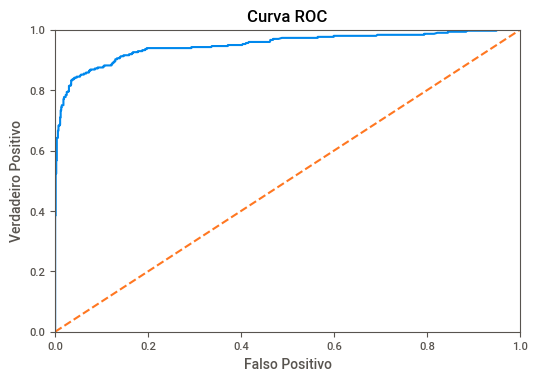

In [ ]:
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [ ]:
# Área sob a curva ROC
auc(fp, tp)

0.9496649674585618

In [ ]:
'''
X_teste = df_teste[['idademae', 'catprenatal', 'qtdsemanas', 'peso', 'apgar1', 'apgar5',
       'tipoparto_num', 'malformacao_num', 'sexo_num', 'estadocivilmae_casada',
       'estadocivilmae_uniao']]
'''
X_teste = df_teste[['apgar5','peso','apgar1','malformacao_num','sexo_num','qtdsemanas',
               'catprenatal','estadocivilmae_casada','estadocivilmae_uniao','idademae','tipoparto_num']]
X_teste = scaler.transform(X_teste) 

In [ ]:
#Calculando a probabilidade de y para os dados de teste
y_proba = modelo_XGB.predict_proba(X_teste)

In [ ]:
#Armazenando a probabilidade
y_proba_df = pd.DataFrame(y_proba)

In [ ]:
output=pd.DataFrame({'id': df_teste.id, 'obito': y_proba[:,1]})
output.describe()
output.to_csv('my_submission.csv', index=False)

In [ ]:
y_proba_df

,0,1
0,0.962584,0.037416
1,0.953181,0.046819
2,0.959266,0.040734
3,0.012381,0.987619
4,0.008559,0.991441
...,...,...
4877,0.977610,0.022390
4878,0.924505,0.075495
4879,0.957367,0.042633
4880,0.965961,0.034040
